<a href="https://colab.research.google.com/github/Asmaulhushna/examples/blob/master/Final_project_2015_Flight_Delays_and_Cancellations_PCA%2BSTOCHASTIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning 3253 Project - "2015 Flight Delays and Cancellations"

##Team Members


*   Asma-Ul-Hushna
*   Xubin Zhao
* 	Yaxal Arenas







## Project Overview

In 2015 there are lots of flight delays in United States for some reason. Nearly one third of all flights in our data set have delays. The main reasons for flight delays are wheather related but in some cases there are also airline or airport related flight delays. This document examines and shows the delay and cancellation causes in several aspects.

## Notebook Contents

This notebook will explore the data, evaluate some models and draw conclusions. It is divided into the following main sections:









1.   Setup the environment - seting up the notebook environment.
2.   Get the data - loading the data set into the notebook.
3.   Explore the data - exploring the raw flights data.
4.   Prepare the data - data cleansing, feature selection\reduction\engineering and      standardization.
5.   Model - training and testing various models.
6.   Evaluate the model - analyzing model results.
7.   Summary - summarizing the observations and conclusions.


## 1. Setup the environment

In [0]:
# import the basic libraries
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from matplotlib import pyplot

# scatter matrix plotting
from pandas.plotting import scatter_matrix

# enable advanced plots
import seaborn as sns

# import sklearn libraries

# feature selection and reduction
from sklearn.decomposition import PCA
# feature clustering
from sklearn.cluster import KMeans

# pipeline processing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion

# data splitting
from sklearn.model_selection import train_test_split

# classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


from sklearn.compose import ColumnTransformer


# model evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [0]:
# ensure full display for dataframe content
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('precision', 5)
pd.set_option('large_repr', 'truncate')
pd.set_option('display.max_colwidth', -1)
pd.set_option('colheader_justify', 'left')

In [0]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Get the data

There are 3 seperate CSV files. We will load them one by one from google drive.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Loading 'flights.csv'**

In [0]:
link_flights = 'https://drive.google.com/open?id=1y6fJQfLJ5o7bwbDZkX09m-shhoq56QB8' # The shareable link

In [6]:
fluff, id = link_flights.split('=')
print (id) # Verify that you have everything after '='

1y6fJQfLJ5o7bwbDZkX09m-shhoq56QB8


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('flights.csv')  
flights_df = pd.read_csv('flights.csv')  # flights.csv Dataset is now stored in a Pandas Dataframe

**Loading 'airlines.csv'**

In [0]:
link_airlines = 'https://drive.google.com/open?id=1lJlVAUqyYcH8eRnnBgc7MEtGJ-Tqq-bh' # The shareable link

In [9]:
fluff, id = link_airlines.split('=')
print (id) # Verify that you have everything after '='

1lJlVAUqyYcH8eRnnBgc7MEtGJ-Tqq-bh


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('airlines.csv')  
airlines_df = pd.read_csv('airlines.csv')  # airlines.csv dataset is now stored in a Pandas Dataframe

**Loading 'airports.csv'**

In [0]:
link_airports = 'https://drive.google.com/open?id=1xY7VJRQQbacbufZZG11GGNOJ1dmnuHLa' # The shareable link

In [12]:
fluff, id = link_airports.split('=')
print (id) # Verify that you have everything after '='

1xY7VJRQQbacbufZZG11GGNOJ1dmnuHLa


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('airports.csv')  
airports_df = pd.read_csv('airports.csv') # airports.csv dataset is now stored in a Pandas Dataframe

## 3. Explore the data

In [14]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print ("The shape of flights dataset is", flights_df.shape)

The shape of flights dataset is (5819079, 31)


In [16]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

Each entry of the 'flights.csv' file corresponds to a flight and we see that more than 5,800,000 flights have been recorded in 2015. These flights are described according to 31 variables. A description of these variables can be found here and we briefly recall the meaning of the variables that will be used in this notebook:

YEAR, MONTH, DAY, DAY_OF_WEEK: dates of the flight 
AIRLINE: An identification number assigned by US DOT to identify a unique airline 

ORIGIN_AIRPORT and DESTINATION_AIRPORT: code attributed by IATA to identify the airports 

SCHEDULED_DEPARTURE and SCHEDULED_ARRIVAL : scheduled times of take-off and landing 

DEPARTURE_TIME and ARRIVAL_TIME: real times at which take-off and landing took place 

DEPARTURE_DELAY and ARRIVAL_DELAY: difference (in minutes) between planned and real times 

DISTANCE: distance (in miles) 

An additional file of this dataset, the airports.csv file, gives a more exhaustive description of the airports:

In [17]:
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [18]:
print ("The shape of airlines dataset is", airlines_df.shape)

The shape of airlines dataset is (14, 2)


In [19]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
IATA_CODE    14 non-null object
AIRLINE      14 non-null object
dtypes: object(2)
memory usage: 304.0+ bytes


In [20]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [21]:
print ("The shape of airports dataset is", airports_df.shape)

The shape of airports dataset is (322, 7)


In [22]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
IATA_CODE    322 non-null object
AIRPORT      322 non-null object
CITY         322 non-null object
STATE        322 non-null object
COUNTRY      322 non-null object
LATITUDE     319 non-null float64
LONGITUDE    319 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [23]:
missing_df = flights_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights_df.shape[0]-missing_df['missing values'])/flights_df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CANCELLATION_REASON,5729195,1.54464
1,WEATHER_DELAY,4755640,18.27504
2,AIRLINE_DELAY,4755640,18.27504
3,SECURITY_DELAY,4755640,18.27504
4,AIR_SYSTEM_DELAY,4755640,18.27504
5,LATE_AIRCRAFT_DELAY,4755640,18.27504
6,ARRIVAL_DELAY,105071,98.19437
7,AIR_TIME,105071,98.19437
8,ELAPSED_TIME,105071,98.19437
9,TAXI_IN,92513,98.41018


In [24]:
flights_df['YEAR'].unique()

array([2015])

In [25]:
flights_df['CANCELLATION_REASON'].count()

89884

In [26]:
flights_df[flights_df['CANCELLED']== 1].count()

YEAR                   89884
MONTH                  89884
DAY                    89884
DAY_OF_WEEK            89884
AIRLINE                89884
FLIGHT_NUMBER          89884
TAIL_NUMBER            75163
ORIGIN_AIRPORT         89884
DESTINATION_AIRPORT    89884
SCHEDULED_DEPARTURE    89884
DEPARTURE_TIME         3731 
DEPARTURE_DELAY        3731 
TAXI_OUT               837  
WHEELS_OFF             837  
SCHEDULED_TIME         89879
ELAPSED_TIME           0    
AIR_TIME               0    
DISTANCE               89884
WHEELS_ON              0    
TAXI_IN                0    
SCHEDULED_ARRIVAL      89884
ARRIVAL_TIME           0    
ARRIVAL_DELAY          0    
DIVERTED               89884
CANCELLED              89884
CANCELLATION_REASON    89884
AIR_SYSTEM_DELAY       0    
SECURITY_DELAY         0    
AIRLINE_DELAY          0    
LATE_AIRCRAFT_DELAY    0    
WEATHER_DELAY          0    
dtype: int64

In [27]:
flights_df[flights_df['ARRIVAL_DELAY'] > 15].count()

YEAR                   1023498
MONTH                  1023498
DAY                    1023498
DAY_OF_WEEK            1023498
AIRLINE                1023498
FLIGHT_NUMBER          1023498
TAIL_NUMBER            1023498
ORIGIN_AIRPORT         1023498
DESTINATION_AIRPORT    1023498
SCHEDULED_DEPARTURE    1023498
DEPARTURE_TIME         1023498
DEPARTURE_DELAY        1023498
TAXI_OUT               1023498
WHEELS_OFF             1023498
SCHEDULED_TIME         1023498
ELAPSED_TIME           1023498
AIR_TIME               1023498
DISTANCE               1023498
WHEELS_ON              1023498
TAXI_IN                1023498
SCHEDULED_ARRIVAL      1023498
ARRIVAL_TIME           1023498
ARRIVAL_DELAY          1023498
DIVERTED               1023498
CANCELLED              1023498
CANCELLATION_REASON    0      
AIR_SYSTEM_DELAY       1023498
SECURITY_DELAY         1023498
AIRLINE_DELAY          1023498
LATE_AIRCRAFT_DELAY    1023498
WEATHER_DELAY          1023498
dtype: int64

In [28]:
flights_df['AIRLINE'].unique()

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'MQ',
       'F9', 'WN', 'VX'], dtype=object)

In [29]:
flights_df['DESTINATION_AIRPORT'].unique()

array(['SEA', 'PBI', 'CLT', 'MIA', 'ANC', 'MSP', 'DFW', 'ATL', 'IAH',
       'PDX', 'MCI', 'FLL', 'ORD', 'HNL', 'PHX', 'EWR', 'JFK', 'MCO',
       'BOS', 'BDL', 'ITO', 'SFO', 'KOA', 'OGG', 'MYR', 'DTW', 'LIH',
       'DEN', 'SJU', 'LAX', 'BWI', 'IAD', 'BQN', 'BUF', 'LGA', 'HOU',
       'SLC', 'PHL', 'SJC', 'OAK', 'LGB', 'TPA', 'DCA', 'TTN', 'BTR',
       'LAS', 'RSW', 'BRD', 'STL', 'RKS', 'MBS', 'SNA', 'MEI', 'MDW',
       'SAN', 'RIC', 'AUS', 'OTZ', 'PIT', 'JAX', 'MSY', 'ONT', 'PSP',
       'BUR', 'DAL', 'CVG', 'SMF', 'RDU', 'JMS', 'BNA', 'DSM', 'MAF',
       'BOI', 'ELP', 'TUS', 'SCC', 'HPN', 'STT', 'MDT', 'RHI', 'SBP',
       'MKE', 'JNU', 'CMH', 'CLD', 'KTN', 'CAK', 'CRP', 'CLE', 'GPT',
       'SHV', 'TYS', 'IND', 'LIT', 'SAT', 'SRQ', 'TUL', 'GRK', 'PNS',
       'BTV', 'CHS', 'DAY', 'OKC', 'SAV', 'XNA', 'COS', 'GJT', 'BZN',
       'PUB', 'HRL', 'HDN', 'MEM', 'GEG', 'ORH', 'SYR', 'GSO', 'VPS',
       'LAW', 'ACY', 'LBB', 'JAC', 'BIL', 'EUG', 'ASE', 'TVC', 'MTJ',
       'CAE', 'PVD',

In [30]:
flights_df['ARRIVAL_DELAY'].describe()

count    5.71401e+06
mean     4.40706e+00
std      3.92713e+01
min     -8.70000e+01
25%     -1.30000e+01
50%     -5.00000e+00
75%      8.00000e+00
max      1.97100e+03
Name: ARRIVAL_DELAY, dtype: float64

**'ARRIVAL_DELAY' The Target**

In [31]:
delayed_flights_df = flights_df[flights_df['ARRIVAL_DELAY']>0]
print("The percentage of planes late in 2015 is %.2f"%(delayed_flights_df.shape[0]*100/flights_df.shape[0]))
ontime_flights_df = flights_df[flights_df['ARRIVAL_DELAY']==0]
print("The percentage of planes right on time in 2015 is %.2f"%(ontime_flights_df.shape[0]*100/flights_df.shape[0]))
advance_flights_df = flights_df[flights_df['ARRIVAL_DELAY']<0]
print("The percentage of planes that arrived ahead of time in 2015 is %.2f"%(advance_flights_df.shape[0]*100/flights_df.shape[0]))

The percentage of planes late in 2015 is 35.86
The percentage of planes right on time in 2015 is 2.17
The percentage of planes that arrived ahead of time in 2015 is 60.16


In [32]:
more_15min_flights_df = flights_df[flights_df['ARRIVAL_DELAY']>15]
print("The percentage of planes that arrived more than 15 minutes late in 2015 is %.2f"%(more_15min_flights_df.shape[0]*100/flights_df.shape[0]))

The percentage of planes that arrived more than 15 minutes late in 2015 is 17.59


In [33]:
more_15min_flights_df.shape

(1023498, 31)

In [34]:
flights_df.loc[:, ['ARRIVAL_DELAY']].describe()

,ARRIVAL_DELAY
count,5.71401e+06
mean,4.40706e+00
std,3.92713e+01
min,-8.70000e+01
25%,-1.30000e+01
50%,-5.00000e+00
75%,8.00000e+00
max,1.97100e+03


Text(0.5, 1.0, 'Distribution of delays')

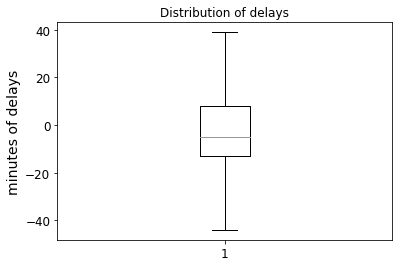

In [35]:
plt.boxplot(flights_df.loc[:, ['ARRIVAL_DELAY']].dropna().T, showfliers=False)
plt.ylabel('minutes of delays')
plt.title('Distribution of delays')

In [36]:
flights_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

1. Categorical Features
MONTH - Month of the Flight Trip
DAY_OF_WEEK - Day of week of the Flight Trip
AIRLINE - Airline Identifier
   map to full airline name
SCHEDULED_ARRIVAL - Planned Arrival Time
  map into 4 categories: early morning, morning, afternoon, evening

2. Numerical Features
DEPARTURE_DELAY - Total Delay on Departure
TAXI_OUT - The time duration elapsed between departure from the origin airport gate and wheels off
WHEELS_OFF - The time point that the aircraft's wheels leave the ground
SCHEDULED_TIME - Planned time amount needed for the flight trip
DISTANCE - Distance between two airports

 3. Target Feature
ARRIVAL_DELAY - ARRIVAL_TIME-SCHEDULED_ARRIVAL
   map to binary data
               >= 15 min delay = 1
               < 15 min delay = 0


4. Filter out record if following columns == 1

DIVERTED - Aircraft landed on airport that out of schedule
CANCELLED - Flight Cancelled (1 = cancelled)

In [37]:
corr_matrix = flights_df.corr()
corr_matrix['ARRIVAL_DELAY'].sort_values(ascending=False)

ARRIVAL_DELAY          1.00000
DEPARTURE_DELAY        0.94467
AIRLINE_DELAY          0.60935
LATE_AIRCRAFT_DELAY    0.52201
WEATHER_DELAY          0.26480
AIR_SYSTEM_DELAY       0.24719
TAXI_OUT               0.22732
DEPARTURE_TIME         0.15979
WHEELS_OFF             0.15577
TAXI_IN                0.11663
SCHEDULED_DEPARTURE    0.10022
SCHEDULED_ARRIVAL      0.08882
WHEELS_ON              0.05888
ARRIVAL_TIME           0.04988
ELAPSED_TIME           0.02912
FLIGHT_NUMBER          0.01842
SECURITY_DELAY         0.00965
DAY                   -0.00310
AIR_TIME              -0.00711
DAY_OF_WEEK           -0.01703
DISTANCE              -0.02544
SCHEDULED_TIME        -0.03003
MONTH                 -0.03679
YEAR                  NaN     
DIVERTED              NaN     
CANCELLED             NaN     
Name: ARRIVAL_DELAY, dtype: float64

### Feature removal

Drop features that don't provide any added value

In [0]:
 final_flights_df = flights_df.drop(columns = ['YEAR', 'DAY', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'ELAPSED_TIME', 'AIR_TIME',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'])

In [39]:
final_flights_df.head()

,MONTH,DAY_OF_WEEK,AIRLINE,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,1,4,AS,-11.0,21.0,15.0,205.0,1448,-22.0,0,0
1,1,4,AA,-8.0,12.0,14.0,280.0,2330,-9.0,0,0
2,1,4,US,-2.0,16.0,34.0,286.0,2296,5.0,0,0
3,1,4,AA,-5.0,15.0,30.0,285.0,2342,-9.0,0,0
4,1,4,AS,-1.0,11.0,35.0,235.0,1448,-21.0,0,0


In [0]:
# We have to filtered out the diverted and cancelled flights

final_flights_df = final_flights_df[final_flights_df['CANCELLED'] == 0]

In [0]:
final_flights_df = final_flights_df[final_flights_df['DIVERTED'] == 0]

In [0]:
final_flights_df.drop(columns = ['CANCELLED','DIVERTED'], inplace = True)

In [43]:
final_flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 9 columns):
MONTH              int64
DAY_OF_WEEK        int64
AIRLINE            object
DEPARTURE_DELAY    float64
TAXI_OUT           float64
WHEELS_OFF         float64
SCHEDULED_TIME     float64
DISTANCE           int64
ARRIVAL_DELAY      float64
dtypes: float64(5), int64(3), object(1)
memory usage: 435.9+ MB


In [44]:
missing = final_flights_df.isnull().sum(axis=0).reset_index()
missing.columns = ['variable', 'missing values']
missing

,variable,missing values
0,MONTH,0
1,DAY_OF_WEEK,0
2,AIRLINE,0
3,DEPARTURE_DELAY,0
4,TAXI_OUT,0
5,WHEELS_OFF,0
6,SCHEDULED_TIME,0
7,DISTANCE,0
8,ARRIVAL_DELAY,0


### Feature Conversion

For further use, I put the content of this this dataframe in a dictionary:

Categorical Features MONTH - Month of the Flight Trip DAY_OF_WEEK - Day of week of the Flight Trip AIRLINE - Airline Identifier map to full airline name SCHEDULED_ARRIVAL - Planned Arrival Time map into 4 categories: early morning, morning, afternoon, evening

In [0]:
airlines_names = airlines_df.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [46]:
airlines_names

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.'}

In [47]:
final_flights_df["AIRLINE"].replace(airlines_names, inplace = True)  
final_flights_df['DAY_OF_WEEK'].unique()

array([4, 5, 6, 7, 1, 2, 3])

In [0]:
week_day = {1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday' , 7 : 'Sunday'}

In [0]:
final_flights_df["DAY_OF_WEEK"].replace(week_day, inplace = True)

In [50]:
final_flights_df["DAY_OF_WEEK"].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [0]:
#Target Feature ARRIVAL_DELAY = ARRIVAL_TIME-SCHEDULED_ARRIVAL map to binary data
     #>= 15 min delay = 1
     #< 15 min delay = 0
    
final_flights_df['ARRIVAL_DELAY_Binary'] = 1*np.ravel(final_flights_df['ARRIVAL_DELAY']>=15)
final_flights_df.drop('ARRIVAL_DELAY', axis = 1, inplace = True)

In [52]:
final_flights_df.head()

,MONTH,DAY_OF_WEEK,AIRLINE,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,ARRIVAL_DELAY_Binary
0,1,Thursday,Alaska Airlines Inc.,-11.0,21.0,15.0,205.0,1448,0
1,1,Thursday,American Airlines Inc.,-8.0,12.0,14.0,280.0,2330,0
2,1,Thursday,US Airways Inc.,-2.0,16.0,34.0,286.0,2296,0
3,1,Thursday,American Airlines Inc.,-5.0,15.0,30.0,285.0,2342,0
4,1,Thursday,Alaska Airlines Inc.,-1.0,11.0,35.0,235.0,1448,0


## Train Test Split

In [0]:
train_set,test_set = train_test_split(final_flights_df, test_size = 0.3, random_state = 42) 

In [54]:
print(len(train_set), "train +", len(test_set), "test")

3999805 train + 1714203 test


In [55]:
test_set.head()

,MONTH,DAY_OF_WEEK,AIRLINE,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,ARRIVAL_DELAY_Binary
3335058,7,Monday,Skywest Airlines Inc.,6.0,12.0,1641.0,75.0,318,0
4857110,10,Friday,Delta Air Lines Inc.,1.0,13.0,1837.0,165.0,950,0
4454180,10,Monday,Southwest Airlines Co.,8.0,7.0,1205.0,115.0,672,0
5132772,11,Tuesday,Delta Air Lines Inc.,0.0,9.0,1314.0,62.0,214,0
4075015,9,Friday,Skywest Airlines Inc.,-6.0,19.0,613.0,60.0,224,0


### Features

In [0]:
target = 'ARRIVAL_DELAY_Binary'
features = list(train_set.columns)
features = [f for f in features if f!=target]

In [0]:
X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]

In [58]:
print('X_tr ',X_tr.shape)
print('y_tr ',y_tr.shape)
print('X_te ',X_te.shape)
print('y_te ',y_te.shape)

X_tr  (3999805, 8)
y_tr  (3999805, 1)
X_te  (1714203, 8)
y_te  (1714203, 1)


# Prepare the data

This dataset contains a mix of categorical and numerical independent variables which as we know will need to pre-processed in different ways and separately. This means that initially they’ll have to go through separate pipelines to be pre-processed appropriately and then we’ll combine them together. So the first step in both pipelines would have to be to extract the appropriate columns that need to be pushed down for pre-processing.

In [0]:
#first thing in preparing data is to drop the label column from train_set

flights_train_set = train_set.drop('ARRIVAL_DELAY_Binary', axis = 1) # drop labels for training set
flights_labels = train_set['ARRIVAL_DELAY_Binary'].copy()

### Catagorical Pipeline

In [0]:
final_df_cat = flights_train_set[['MONTH' ,'DAY_OF_WEEK', 'AIRLINE']]

In [61]:
ordinal_encoder = OrdinalEncoder()
final_flights_df_encoded = ordinal_encoder.fit_transform(final_df_cat)
final_flights_df_encoded[:10]

array([[ 8.,  2.,  4.],
       [ 3.,  6.,  3.],
       [ 6.,  2.,  8.],
       [ 1.,  0.,  7.],
       [ 0.,  5.,  3.],
       [ 4.,  0.,  4.],
       [ 6.,  0.,  0.],
       [11.,  6.,  9.],
       [ 0.,  1.,  3.],
       [ 7.,  2.,  1.]])

In [62]:
ordinal_encoder.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object),
 array(['Alaska Airlines Inc.', 'American Airlines Inc.',
        'American Eagle Airlines Inc.', 'Atlantic Southeast Airlines',
        'Delta Air Lines Inc.', 'Frontier Airlines Inc.',
        'Hawaiian Airlines Inc.', 'JetBlue Airways',
        'Skywest Airlines Inc.', 'Southwest Airlines Co.',
        'Spirit Air Lines', 'US Airways Inc.', 'United Air Lines Inc.',
        'Virgin America'], dtype=object)]

In [0]:
cat_encoder = OneHotEncoder(sparse = False)

In [64]:
cat_encoder_1hot = cat_encoder.fit_transform(final_df_cat)
cat_encoder_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
#Defining the steps in the categorical pipeline

from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ('cat_encoder', cat_encoder)
    
])

cat_pipeline 

Pipeline(memory=None,
         steps=[('cat_encoder',
                 OneHotEncoder(categorical_features=None, categories=None,
                               drop=None, dtype=<class 'numpy.float64'>,
                               handle_unknown='error', n_values=None,
                               sparse=False))],
         verbose=False)

### Numerical Pipeline

In [66]:
flights_train_set.columns

Index(['MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'DISTANCE'],
      dtype='object')

In [0]:
flights_df_num = flights_train_set.drop(['MONTH', 'DAY_OF_WEEK', 'AIRLINE','SCHEDULED_TIME'], axis = 1)

In [0]:
#Defining the steps in the numerical pipeline

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

flights_df_num_tr = num_pipeline.fit_transform(flights_df_num)

In [69]:
flights_df_num_tr

array([[-0.30600161, -0.233028  ,  1.30699744, -0.68901788],
       [-0.4414802 ,  0.2174292 ,  0.72464879, -0.98142985],
       [-0.36019305,  0.3300435 , -1.11878591, -1.14242071],
       ...,
       [-0.38728877,  2.69494381, -0.90793554, -0.52145597],
       [-0.49567164,  5.05984412, -0.45209711, -0.8746502 ],
       [-0.38728877, -0.5708709 , -1.3075472 , -0.10747947]])

## Combining the pipelines together

In [0]:
num_attribute = list(flights_df_num)
cat_attribute = ['MONTH' ,'DAY_OF_WEEK', 'AIRLINE']

#Combining numerical and categorical piepline into one full big pipeline horizontally 

full_pipeline = ColumnTransformer ([
                     ("num", num_pipeline, num_attribute),
                     ("cat", cat_pipeline, cat_attribute)
])

flights_df_prepared = full_pipeline.fit_transform(flights_train_set)

In [71]:
flights_df_prepared

array([[-0.30600161, -0.233028  ,  1.30699744, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4414802 ,  0.2174292 ,  0.72464879, ...,  0.        ,
         0.        ,  0.        ],
       [-0.36019305,  0.3300435 , -1.11878591, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.38728877,  2.69494381, -0.90793554, ...,  0.        ,
         0.        ,  0.        ],
       [-0.49567164,  5.05984412, -0.45209711, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38728877, -0.5708709 , -1.3075472 , ...,  0.        ,
         0.        ,  0.        ]])

In [72]:
flights_df_prepared.shape

(3999805, 37)

### PCA and Decision tree

In [0]:
from sklearn.decomposition import PCA


pca = PCA(.95)

In [74]:
pca.fit(flights_df_prepared)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
pca.n_components_

25

In [0]:
flights_df_reduced = pca.transform(flights_df_prepared)

In [0]:
dt = DecisionTreeClassifier(random_state=1)

In [78]:
dt.fit(flights_df_reduced, flights_labels) #with PCA

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
X_te = test_set.drop("ARRIVAL_DELAY_Binary", axis=1)
y_te = test_set["ARRIVAL_DELAY_Binary"].copy()

X_test_prepared = full_pipeline.transform(X_te)
X_test_reduced = pca.transform(X_test_prepared)

In [0]:
y_pred= dt.predict(X_test_reduced)

In [92]:
accuracy_score(y_te,y_pred)

0.912149261201853

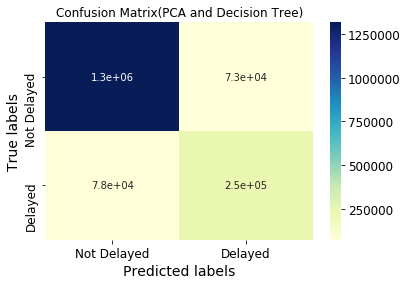

In [94]:
cm = confusion_matrix(y_pred, y_te)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix(PCA and Decision Tree)'); 
ax.xaxis.set_ticklabels(['Not Delayed', 'Delayed']); ax.yaxis.set_ticklabels(['Not Delayed', 'Delayed']);

In [108]:
#let see how it do without PCA

dt.fit(flights_df_prepared, flights_labels)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
X_te = test_set.drop("ARRIVAL_DELAY_Binary", axis=1)
y_te = test_set["ARRIVAL_DELAY_Binary"].copy()

X_test_prepared = full_pipeline.transform(X_te)

In [111]:
y_pred= dt.predict(X_test_prepared)
print ("Accuracy of Decision Tree without PCA is", accuracy_score(y_te,y_pred))

Accuracy of Decision Tree without PCA is 0.9130639720033158


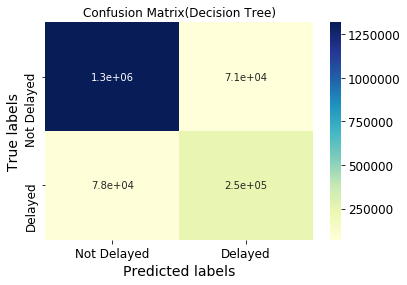

In [112]:
cm = confusion_matrix(y_pred, y_te)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix(Decision Tree)'); 
ax.xaxis.set_ticklabels(['Not Delayed', 'Delayed']); ax.yaxis.set_ticklabels(['Not Delayed', 'Delayed']);

### Stochastic Gradient Boosting

In [0]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate sgbr
sgbr = GradientBoostingClassifier(max_depth=4, 
            subsample=0.7,
            max_features=0.2,
            n_estimators=200,                                
            random_state=2)

In [83]:
# Fit sgbr to the training set
sgbr.fit(flights_df_prepared, flights_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=0.2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=2, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
# Predict test set labels
X_test_prepared = full_pipeline.transform(X_te)

y_pred = sgbr.predict(X_test_prepared)

In [104]:
# Evaluate test set accuracy
acc_test = accuracy_score(y_te, y_pred)
acc_test

0.9447935862905386

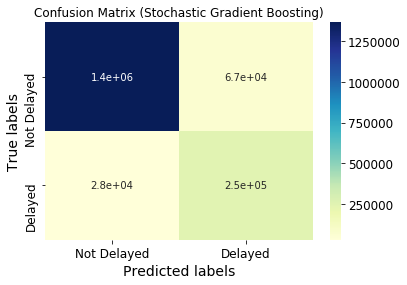

In [97]:
cm = confusion_matrix(y_pred, y_te)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (Stochastic Gradient Boosting)'); 
ax.xaxis.set_ticklabels(['Not Delayed', 'Delayed']); ax.yaxis.set_ticklabels(['Not Delayed', 'Delayed']);

### SGDClassifier

In [98]:
from sklearn.linear_model import SGDClassifier

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {
               'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
               'max_iter': [1000], # number of epochs
               'loss': ['log','hinge'],
               'penalty': ['l1','l2'],
               'n_jobs': [-1]
              }
                           
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(flights_df_prepared, flights_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=0,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0],
                         'loss': ['log', 'hinge'], 'max_iter': [1000],
       

In [99]:
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Best CV params", searcher.best_estimator_)


Best CV params {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l2'}
Best CV accuracy 0.9437417574106738
Best CV params SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [0]:
# applying the best model to the Test Set of the data

SGD_final_model = searcher.best_estimator_

X_te = test_set.drop("ARRIVAL_DELAY_Binary", axis=1)
y_te = test_set["ARRIVAL_DELAY_Binary"].copy()

X_test_prepared = full_pipeline.transform(X_te)

In [101]:
SGD_final_predictions = SGD_final_model.predict(X_test_prepared)
print("Test accuracy of best grid search hypers:", SGD_final_model.score(X_test_prepared, y_te))

Test accuracy of best grid search hypers: 0.943909210286063


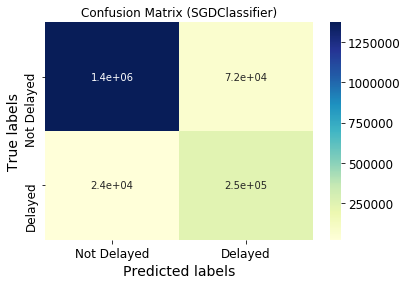

In [107]:
cm = confusion_matrix(SGD_final_predictions, y_te)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (SGDClassifier)'); 
ax.xaxis.set_ticklabels(['Not Delayed', 'Delayed']); ax.yaxis.set_ticklabels(['Not Delayed', 'Delayed']);

### Random Forest

In [0]:
clf = RandomForestClassifier(n_estimators=3, random_state=0)   

In [0]:
# Random Forest with Cross Validation
# We will use Area under the Curve of ROC for scoring method

scores_clf = cross_val_score(clf,flights_df_prepared,flights_labels ,scoring = 'roc_auc',cv=4)

In [0]:
#Scores for Random Forest

print(scores_clf)

In [0]:
# For Random Forrest

param_grid = {'n_estimators': [20, 30, 40]}

forest_clf = RandomForestClassifier(random_state=42)

forest_grid_search = GridSearchCV(forest_clf, param_grid, cv = 2, scoring = "roc_auc", return_train_score=True)

forest_grid_search.fit(flights_df_prepared,flights_labels)

In [0]:
forest_grid_search.best_params_

In [0]:
forest_grid_search.best_estimator_

In [0]:
forest_grid_search.best_score_

In [0]:
# applying the best model to the Test Set of the data

forest_final_model = forest_grid_search.best_estimator_

X_te = test_set.drop("ARRIVAL_DELAY_Binary", axis=1)
y_te = test_set["ARRIVAL_DELAY_Binary"].copy()

X_test_prepared = full_pipeline.transform(X_te)
forest_final_predictions = forest_final_model.predict(X_test_prepared)

print(classification_report(forest_final_predictions, y_te))

In [0]:
print(confusion_matrix(forest_final_predictions, y_te))

In [0]:
cm = confusion_matrix(forest_final_predictions, y_te))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

In [0]:
# predict probabilities
probs_forest = forest_final_model.predict_proba(X_test_prepared)

# keep probabilities for the positive outcome only
probs_forest = probs_forest[:, 1]
# calculate AUC
auc = roc_auc_score(y_te, probs_forest)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_te, probs_forest)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.title("ROC Curve for Random Forest Final Model")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.show()
pyplot.show()

In [0]:
#Visualizing features importances

# Create a pd.Series of features importances
importances = pd.Series(data=forest_final_model.feature_importances_,
                        index= flights_df_prepared.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()